#### Problem 4.1 (Page 154)

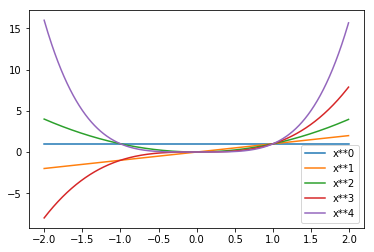

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-2, 2, 0.01)
degree = np.arange(5)
for i in degree:
    y = x ** i
    label = 'x**'+str(i)
    plt.plot(x, y, label=label)
plt.legend()
plt.show()

#### Problem 4.3 (Page 154)

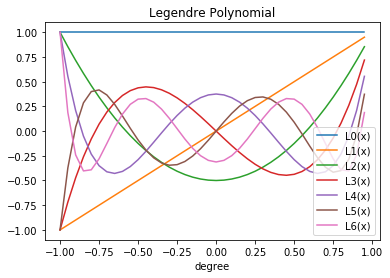

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def L(k, x):
    if k == 0:
        return [1]
    elif k == 1:
        return [1, x]
    else:
        temp = L(k-1, x)
        lkx = (2 * k - 1) / k * x * temp[-1] - (k - 1) / k * temp[-2]
        temp.append(lkx)
        return temp

X = np.arange(-1, 1, 0.05)
Y = []
for x in X:
    y = L(6, x)
    Y.append(y)
Y = np.array(Y)

for k in range(7):
    plt.plot(X, Y[:, k], label="L"+str(k)+"(x)")
    plt.legend()

plt.legend()
plt.xlabel("degree")
plt.title("Legendre Polynomial")
plt.show()

#### Problem 4.4 (Page 155)

E2=2.082396716905117
E10=2.1130425056211815
E10-E2=0.03064578871606427


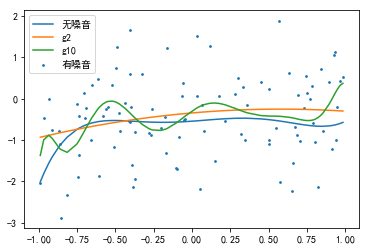

In [4]:
import numpy as np
from numpy.linalg import inv
from scipy.integrate import quad
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

#参数
Qf = 5
N = 100
sigma2 = 1

#### Step 1:数据准备

#定义勒让德多项式，产生L(0,x),...,L(k,x),注意这里不要用递归
def L(k,x):
    if(k == 0):
        return [1.0]
    elif(k == 1):
        return [1.0, x * 1.0]
    else:
        result = [1, x]
        for i in range(2,k+1):
            s = (2 * i - 1) / i * (x * result[-1]) - (i - 1) / i * result[-2]
            result.append(s)
        return result

#系数ai
a = np.random.normal(size=Qf+1)

#标准化
k = np.arange(1, 2*Qf+2, 2)
s = (2 * a**2 / k).sum()
a = a / np.sqrt(s)

#产生点集
x = np.random.uniform(low=-1, high=1, size=N)
x.sort()
x = x.reshape(-1, 1)
#计算之前所述的X
X = []
for i in x:
    temp = L(Qf, i)
    X.append(temp)
X = np.array(X)
#差生误差项
epsilon = np.sqrt(sigma2) * np.random.normal(size=N)
#计算Y
Y1 = X.dot(a.T)
Y = Y1 + epsilon


#### Step 2:拟合数据

#对一个数据特征转换,将x转换为(1,x,...,x^k)
poly2 = PolynomialFeatures(2)
poly10 = PolynomialFeatures(10)

#特征转换
X2 = poly2.fit_transform(x)
X10 = poly10.fit_transform(x)

#计算结果
w2 = inv(X2.T.dot(X2)).dot(X2.T).dot(Y)
w10 = inv(X10.T.dot(X10)).dot(X10.T).dot(Y)


#### Step 3:计算结果

#构造被积函数,a为系数
def E(x, w, a, sigma2):
    """
    被积函数
    """
    #计算f(x)
    #n为勒让德多项式次数
    n = len(a)-1
    l = L(n, x)
    f = a.dot(l)
    
    #计算g(x)
    X = np.array([x**i for i in range(len(w))])
    g = X.dot(w)
    
    return (g - f) ** 2 / 2 + sigma2

E2 = quad(E, -1, 1, args=(w2, a, sigma2))[0]
E10 = quad(E, -1, 1, args=(w10, a, sigma2))[0]

print("E2=" + str(E2))
print("E10=" + str(E10))
print("E10-E2=" + str(E10 - E2))

#### Step 4:作图
Y2 = X2.dot(w2)
Y10 = X10.dot(w10)

plt.plot(x, Y1, label='无噪音')
plt.scatter(x, Y, label='有噪音',s=3)
plt.plot(x, Y2, label='g2')
plt.plot(x, Y10, label='g10')
plt.legend()
plt.show()

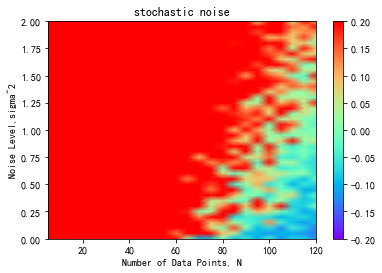

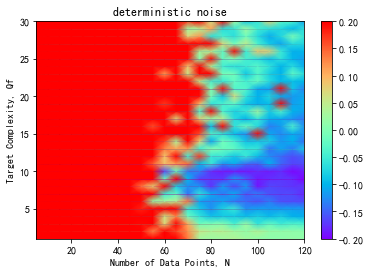

In [5]:
import numpy as np
import pickle
from numpy.linalg import inv
from scipy.integrate import quad
from sklearn.preprocessing import PolynomialFeatures
from helper import process
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号


#############################
##stochastic noise

E = {}
t = 100

Qf = [20]
N = np.arange(5, 122, 5)
sigma2 = np.arange(0, 2.01, 0.05)
q = 20
'''
#进行实验，因为时间太长，这里注释掉
for n in N:
    for s in sigma2:
        e = np.array([])
        for i in range(t):
            error = process(q, n, s)
            e = np.append(e, error)
        E[(q, n, s)] = np.mean(e)

#保存数据
#with open('stochastic noise.pickle', 'wb') as f:
#    pickle.dump(E, f)
'''

#如果不训练读取数据即可
#读取数据
pickle_in = open('stochastic noise.pickle', 'rb')
E = pickle.load(pickle_in)


#读取后横坐标N以及纵坐标sigma2以及对应的差值c      
c = []
n1 = []
s1 = []
for i in E:
    n1.append(i[1])
    s1.append(i[2])
    c.append(E[i])

c = np.array(c)
n1 = np.array(n1)
s1 = np.array(s1)

n1, s1 = np.meshgrid(n1, s1)
result = []
for i in range(len(n1)):
    n = n1[i]
    s = s1[i]
    temp = []
    for j in range(len(n)):
        temp.append(E[(q, n[j], s[j])])
    result.append(temp)

cm = plt.cm.get_cmap('rainbow')
plt.pcolormesh(n1, s1, result, cmap=cm, vmin=-0.2, vmax=0.2, shading='gouraud', edgecolors='face')
plt.xlabel("Number of Data Points, N")
plt.ylabel("Noise Level,sigma^2")
plt.title("stochastic noise")
plt.colorbar()
plt.show()

#############################
##deterministic noise

Qf = np.arange(1, 31)
N = np.arange(5, 121, 5)
sigma2 = 0.1
s = sigma2

E = {}
t = 150
'''
#进行实验，因为时间太长，这里注释掉
for q in Qf:
    for n in N:
        e = np.array([])
        for i in range(t):
            error = process(q, n, s)
            e = np.append(e, error)
        E[(q,n,s)] = np.mean(e)

#保存数据
#with open('deterministic noise.pickle', 'wb') as f:
#    pickle.dump(E, f)
'''

#如果不训练读取数据即可
#读取数据
pickle_in = open('deterministic noise.pickle', 'rb')
E = pickle.load(pickle_in)

c = []
q1 = []
n1 = []
for i in E:
    q1.append(i[0])
    n1.append(i[1])
    c.append(E[i])

c = np.array(c)
q1 = np.array(q1)
n1 = np.array(n1)

n1, q1 = np.meshgrid(n1, q1)
result = []

for i in range(len(q1)):
    q = q1[i]
    n = n1[i]
    temp = []
    for j in range(len(q)):
        temp.append(E[(q[j], n[j], sigma2)])
    result.append(temp)
   
cm = plt.cm.get_cmap('rainbow')
plt.pcolormesh(n1, q1, result, cmap=cm, vmin=-0.2, vmax=0.2, shading='gouraud', edgecolors='face')
plt.colorbar()
plt.xlabel("Number of Data Points, N")
plt.ylabel("Target Complexity, Qf")
plt.title("deterministic noise")
plt.show()

#### Problem 4.19 (Page 161)

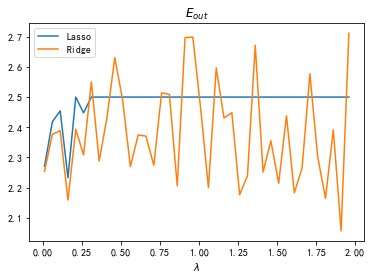

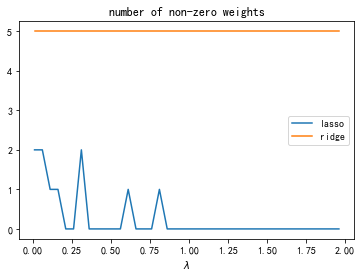

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from helper import L, E


def process(Lambda, Qf=5, N=100, sigma2=1, d=2):
    """
    进行一次实验，Lambda为正则项的系数，Qf为勒让德多项式的次数，
    N为数据数量，sigma2为方差，d为特征转换的次数
    """
    #### Step 1:数据准备
    #系数ai
    a = np.random.normal(size=Qf+1)
    
    #标准化
    k = np.arange(1, 2*Qf+2, 2)
    s = (2*a**2/k).sum()
    a = a / np.sqrt(s)
    
    #产生点集
    x = np.random.uniform(low=-1, high=1, size=N)
    x.sort()
    x = x.reshape(-1, 1)
    #计算之前所述的X
    X = []
    for i in x:
        temp = L(Qf, i)
        X.append(temp)
    X = np.array(X)
    #差生误差项
    epsilon = np.sqrt(sigma2) * np.random.normal(size=N)
    #计算Y
    Y = X.dot(a.T) + epsilon
    
    #### Step 2:拟合数据
    polyd = PolynomialFeatures(d)
    
    #特征转换
    Xd = polyd.fit_transform(x, d)
    
    #计算Lasso回归,Ridge回归
    #Lasso
    lasso=linear_model.Lasso(alpha=Lambda)
    lasso.fit(Xd, Y)
    
    #Ridge
    ridge=linear_model.Ridge(alpha=Lambda)
    ridge.fit(Xd, Y)
    
    #### Step 3:计算结果
    
    El=quad(E, -1, 1, args=(lasso.coef_, a, sigma2))[0]
    Eq=quad(E, -1, 1, args=(ridge.coef_, a, sigma2))[0]

    return El, Eq, lasso.coef_, ridge.coef_

#(a)
Lambda = np.arange(0.01,2.01,0.05)
El = []
Eq = []
lasso = []
ridge = []
for l in Lambda:
    result = process(l)
    El.append(result[0])
    Eq.append(result[1])
    
plt.plot(Lambda, El, label='Lasso')
plt.plot(Lambda, Eq, label='Ridge')
plt.xlabel('$\lambda$')
plt.title('$E_{out}$')
plt.legend()
plt.show()

#(c)
lasso = []
ridge = []
for l in Lambda:
    result = process(l, Qf=20, N=3, d=5)
    lasso.append(np.sum(result[2] != 0))
    ridge.append(np.sum(result[3] != 0))
plt.plot(Lambda, lasso, label='lasso')
plt.plot(Lambda, ridge, label='ridge')
plt.title('number of non-zero weights')
plt.legend()
plt.xlabel('$\lambda$')
plt.show()

#### Problem 4.24 (Page 163)

In [7]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

d = 3
N = range(d+15, d+116, 10)

#计算一次实验结果
def process(n, d=3, sigma=0.5, k=0.05):
    #生成点
    X = np.random.normal(size=(n, d))
    #偏置项
    bias = np.ones(n)
    #合并X和bias
    X = np.c_[bias, X]
    #正则项系数
    k = k / n
    #权重
    w = np.zeros(d+1)
    #生成噪声
    epsilon = np.random.normal(size=n)
    #生成y
    y = X.dot(w) + sigma * epsilon
    e1 = 0
    e2 = 0
    E = np.array([])
    #交叉验证
    for i in range(n):
        X1 = np.r_[X[:i, :], X[i+1:, :]]
        y1 = np.r_[y[:i], y[i+1:]]
        w1 = inv(X1.T.dot(X1) + k * np.eye(d+1)).dot(X1.T.dot(y1))
        e = (X[i].dot(w1) - y[i]) ** 2
        E = np.append(E, e)
        if(i == 1):
            e1 = e
        elif i == 2:
            e2 = e
    return e1, e2, np.mean(E)

#(a)
#记录每个N对应的e1,e2,ecv
E = {}
for n in N:
    E[n] = []

for n in N:
    E1 = np.array([])
    E2 = np.array([])
    Ecv = np.array([])
    for i in range(3000):
        e1, e2, ecv = process(n)
        E1 = np.append(E1, e1)
        E2 = np.append(E2, e2)
        Ecv = np.append(Ecv, ecv)
    #计算均值和方差
    mean = (E1.mean(), E2.mean(), Ecv.mean())
    var = (E1.var(), E2.var(), Ecv.var())
    E[n].append(mean)
    E[n].append(var)

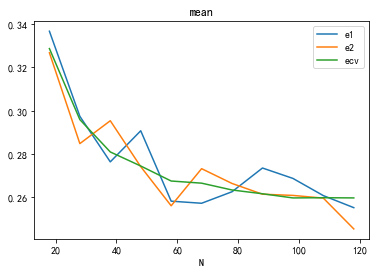

In [8]:
#(b)
meanE1 = np.array([])
meanE2 = np.array([])
meanEcv = np.array([])
for n in N:
    mean = E[n][0]
    meanE1 = np.append(meanE1, mean[0])
    meanE2 = np.append(meanE2, mean[1])
    meanEcv = np.append(meanEcv,mean[2])
plt.plot(N, meanE1, label='e1')
plt.plot(N, meanE2, label='e2')
plt.plot(N, meanEcv, label='ecv')
plt.title('mean')
plt.xlabel('N')
plt.legend()
plt.show()

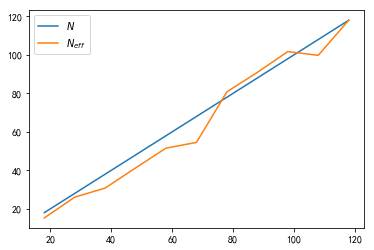

In [9]:
#(e)
varE1 = np.array([])
varE2 = np.array([])
varEcv = np.array([])
for n in N:
    var = E[n][1]
    varE1 = np.append(varE1, var[0])
    varE2 = np.append(varE2, var[1])
    varEcv = np.append(varEcv, var[2])
plt.plot(N, N, label='$N$')
plt.plot(N, varE1 / varEcv, label='$N_{eff}$')
plt.legend()
plt.show()  